Customer churn is the loss of clients or customers. In order to avoid losing customers, a company needs to examine why its customers have left in the past and which features are more important to determine who will churn in the future. Our task is therefore to predict whether customers are about to churn and which are the most important features to get that prediction right. As in most prediction problems, we will use machine learning.

## Import Library

In [1]:
pip install -U imbalanced-learn

  Using cached imbalanced_learn-0.8.0-py3-none-any.whl (206 kB)
  Using cached scikit_learn-0.24.2-cp38-cp38-win_amd64.whl (6.9 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.23.2
    Uninstalling scikit-learn-0.23.2:
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an EnvironmentError: [WinError 5] Access is denied: 'c:\\programdata\\anaconda3\\lib\\site-packages\\scikit_learn-0.23.2.dist-info\\COPYING'
Consider using the `--user` option or check the permissions.



In [1]:
# Linear algebra
import numpy as np

# Data processing
import pandas as pd

# Data visualization
import seaborn as sns

## Load Datasets

In [2]:
# Load Data From Local File
data = pd.read_csv("telco.csv", sep=';')

## Data Understanding

In [3]:
# Show the first 5 data
data.head()

,customerid,region,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,...,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,2424-WVHPL,France,Male,1,No,No,1,Yes,No,Fiber optic,...,No,No,Yes,No,No,No,Electronic check,12.00,12,No
1,3679-XASPY,France,Female,0,Yes,Yes,1,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,No,Electronic check,13.00,13,No
2,2967-MXRAV,Germany,Male,0,Yes,Yes,1,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,No,Mailed check,18.80,18.8,No
3,8992-CEUEN,Germany,Female,0,No,No,1,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,No,Electronic check,18.85,18.85,No
4,9318-NKNFC,Germany,Male,0,No,No,1,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Yes,Mailed check,18.85,18.85,Yes


In [5]:
# See the number of rows and number of columns of data
data.shape

(7043, 21)

In [6]:
# Understanding each variable
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        7043 non-null   object 
 1   region            7043 non-null   object 
 2   gender            7043 non-null   object 
 3   seniorcitizen     7043 non-null   int64  
 4   partner           7043 non-null   object 
 5   dependents        7043 non-null   object 
 6   tenure            7043 non-null   int64  
 7   phoneservice      7043 non-null   object 
 8   multiplelines     7043 non-null   object 
 9   internetservice   7043 non-null   object 
 10  onlinesecurity    7043 non-null   object 
 11  onlinebackup      7043 non-null   object 
 12  deviceprotection  7043 non-null   object 
 13  techsupport       7043 non-null   object 
 14  streamingtv       7043 non-null   object 
 15  streamingmovies   7043 non-null   object 
 16  paperlessbilling  7043 non-null   object 


In [7]:
# See a statistical summary of variables with numeric types
data.describe()

,seniorcitizen,tenure,monthlycharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.401107,64.751874
std,0.368612,24.606849,30.097858
min,0.000000,1.000000,12.000000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,120.000000,118.750000


The dataset includes information about:
+ Customers who churned — the column is called Churn
+ Services that each customer has signed up for — phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
+ Customer account information — how long they’ve been a customer, the type of contract (month-to-month, one-year, two-years), payment method, paperless billing, monthly charges, and total charges
+ Demographic info about customers — gender, age, and if they have partners and dependents

## Data Cleaning and Preprocessing

### Check Duplicate Data

In [8]:
# Drop duplicate value
data.drop_duplicates(inplace = True)

In [9]:
# See changes in the number of rows and columns after the duplicate value is deleted
data.shape

(7043, 21)

### Check Data Types

In [10]:
# Check Data Type
data.dtypes

customerid           object
region               object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges         object
churn                object
dtype: object

Jika diperhatikan, tipe data pada kolom totalcharges tidak sesuai. Karena seharusnya memiliki tipe data float bukan string/object. Penyebabnya dikarenakan terdapat mising value, namun missing value diberi nilai spasi. Maka kita perlu ganti menjadi nan

In [11]:
# Mengubah missing value (spasi) menjadi nilai nan(nilai kosong)
data["totalcharges"] = data["totalcharges"].replace(" ", np.nan)

In [12]:
# Kita ubah tipe datanya
data["totalcharges"] = data["totalcharges"].astype("float64")

In [13]:
data.dtypes

customerid           object
region               object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges        float64
churn                object
dtype: object

### Check Missing Value

In [14]:
# Check the missing value
data.isnull().sum()

customerid           0
region               0
gender               0
seniorcitizen        0
partner              0
dependents           0
tenure               0
phoneservice         0
multiplelines        0
internetservice      0
onlinesecurity       0
onlinebackup         0
deviceprotection     0
techsupport          0
streamingtv          0
streamingmovies      0
paperlessbilling     0
paymentmethod        0
monthlycharges       0
totalcharges        11
churn                0
dtype: int64

### Impute Missing value

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='monthlycharges', ylabel='Density'>

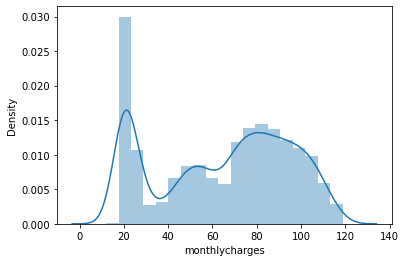

In [15]:
# Look at the distribution of the totalcharges variable with histogram and density plot
sns.distplot(data["monthlycharges"])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='totalcharges'>

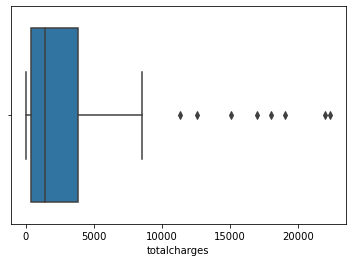

In [16]:
# Look at the distribution of the totalcharges variable with boxplot
sns.boxplot(data["totalcharges"])

In [17]:
# Because the totalcharges variable has positive skewed, therefore the missing value is imputed with the median
fill = data["totalcharges"].median()
data["totalcharges"] = data["totalcharges"].fillna(fill)

In [18]:
# Check missing value after imputation
data.isnull().sum()

customerid          0
region              0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

### Outlier Detection

In [19]:
# Make function to detect outlier using upper bound and lower bound
def outlier(sample):
    Q1 = sample.quantile(0.25)
    Q3 = sample.quantile(0.75)
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    number_outlier = len(sample[sample > upper_range]) + len(sample[sample < lower_range])
    print("Number of Outlier {}".format(number_outlier))
    if number_outlier > 0:
        print("Outlier observation row:")
    else:
        pass
    for i in range(len(sample)):
        if sample[i] < lower_range: 
            print(i)
        elif sample[i] > upper_range:
            print(i)
        else:
            pass

In [20]:
# Check Outlier on the Tenure variable
outlier(data["tenure"])

Number of Outlier 0


In [21]:
# Check Outlier on the monthlycharges variable
outlier(data["monthlycharges"])

Number of Outlier 0


In [22]:
# Check Outlier on the totalcharges variable
outlier(data["totalcharges"])

Number of Outlier 8
Outlier observation row:
7024
7025
7026
7027
7028
7029
7030
7031


In [23]:
# See observation outliers on the totalcharges variable
Q1 = data["totalcharges"].quantile(0.25)
Q3 = data["totalcharges"].quantile(0.75)
IQR = Q3 - Q1
lower_range = Q1 - (1.5 * IQR)
upper_range = Q3 + (1.5 * IQR)
data.loc[(data["totalcharges"] > upper_range), :]

,customerid,region,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,...,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
7024,2889-FPWRM,Germany,Male,0,Yes,No,96,Yes,Yes,Fiber optic,...,Yes,Yes,Yes,Yes,Yes,Yes,Bank transfer (automatic),117.80,11308.8,Yes
7025,7892-POOKP,France,Female,0,Yes,No,120,Yes,Yes,Fiber optic,...,No,Yes,Yes,Yes,Yes,Yes,Electronic check,104.80,12576.0,Yes
7026,7569-NMZYQ,Germany,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,...,Yes,Yes,Yes,Yes,Yes,Yes,Bank transfer (automatic),118.75,15087.9,No
7027,9739-JLPQJ,Germany,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,...,Yes,Yes,Yes,Yes,Yes,No,Credit card (automatic),117.50,16987.9,No
7028,9924-JPRMC,Germany,Male,0,No,No,72,Yes,Yes,Fiber optic,...,Yes,Yes,Yes,Yes,Yes,Yes,Electronic check,118.20,17987.3,No
7029,8879-XUAHX,Germany,Male,0,Yes,No,71,Yes,Yes,Fiber optic,...,Yes,Yes,Yes,Yes,Yes,Yes,Electronic check,116.25,18987.9,No
7030,9788-HNGUT,Germany,Male,0,Yes,No,72,Yes,Yes,Fiber optic,...,Yes,Yes,Yes,Yes,Yes,Yes,Credit card (automatic),116.95,21987.5,No
7031,6007-TCTST,Germany,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,...,Yes,Yes,Yes,Yes,Yes,Yes,Bank transfer (automatic),115.80,22345.6,No


In [24]:
# Replace outlier observations with upper bound and lower bound
data.loc[(data["totalcharges"] > upper_range), "totalcharges"] = upper_range
data.loc[(data["totalcharges"] < lower_range), "totalcharges"] = lower_range

In [25]:
# Check outlier after replace with upper and lower bound 
outlier(data["totalcharges"])

Number of Outlier 0


### Handle Inconsistent Data

In [26]:
# Replace "No Internet Service" with "No"
replace_cols1 = ['onlinesecurity', 'onlinebackup', 'deviceprotection',
                'techsupport','streamingtv', 'streamingmovies']
for i in replace_cols1 :
    data[i]  = data[i].str.strip()
    data[i]  = data[i].replace({'No internet service' : 'No'})

# Replace "No Phone Service" with "No"
replace_cols2 = ['multiplelines']
for i in replace_cols2 :
    data[i]  =data[i].str.strip()
    data[i]  = data[i].replace({'No phone service' : 'No'})

# Feature Enginering

### Binning or Discretization Variable

In [27]:
# Binning tenure variables become categorical variables
from sklearn.preprocessing import KBinsDiscretizer

scaler = KBinsDiscretizer(n_bins=[5], encode = "ordinal", strategy = 'quantile')
data[["tenure"]] = scaler.fit_transform(data[["tenure"]])

In [28]:
data.tenure.value_counts()

1.0    1436
2.0    1414
3.0    1413
4.0    1409
0.0    1371
Name: tenure, dtype: int64

In [29]:
# Check Tenure Data Type
data.dtypes

customerid           object
region               object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure              float64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges        float64
churn                object
dtype: object

### Encoding Variables

In [30]:
from sklearn.preprocessing import LabelEncoder

# Separating categorical and numerical columns
Id_col     = ['customerid']
target_col = ["churn"]
cat_cols   = data.nunique()[data.nunique() < 5].keys().tolist()
cat_cols   = [x for x in cat_cols if x not in target_col]
num_cols   = [x for x in data.columns if x not in cat_cols + target_col + Id_col]

# Binary columns with 2 values
bin_cols   = data.nunique()[data.nunique() == 2].keys().tolist()

# Multinomial columns
multi_cols = [i for i in cat_cols if i not in bin_cols]

# Label encoding Binary columns
le = LabelEncoder()
for i in bin_cols :
    data[i] = le.fit_transform(data[i])
    
# Label encoding for nominal multi value columns
data = pd.get_dummies(data = data,columns = multi_cols, drop_first=True)

In [31]:
data

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,onlinesecurity,onlinebackup,...,monthlycharges,totalcharges,churn,region_France,region_Germany,internetservice_Fiber optic,internetservice_No,paymentmethod_Credit card (automatic),paymentmethod_Electronic check,paymentmethod_Mailed check
0,2424-WVHPL,1,1,0,0,0.0,1,0,0,0,...,12.00,12.000,0,1,0,1,0,0,1,0
1,3679-XASPY,0,0,1,1,0.0,1,0,0,0,...,13.00,13.000,0,1,0,0,1,0,1,0
2,2967-MXRAV,1,0,1,1,0.0,1,0,0,0,...,18.80,18.800,0,0,1,0,1,0,0,1
3,8992-CEUEN,0,0,0,0,0.0,1,0,0,0,...,18.85,18.850,0,0,1,0,1,0,1,0
4,9318-NKNFC,1,0,0,0,0.0,1,0,0,0,...,18.85,18.850,1,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,4472-LVYGI,0,0,1,1,0.0,0,0,1,0,...,52.55,1397.475,0,0,1,0,0,0,0,0
7039,1371-DWPAZ,0,0,1,1,0.0,0,0,1,1,...,56.05,1397.475,0,0,1,0,0,1,0,0
7040,2775-SEFEE,1,0,0,1,0.0,1,1,1,1,...,61.90,1397.475,0,0,1,0,0,0,0,0
7041,4075-WKNIU,0,0,1,1,0.0,1,1,0,1,...,73.35,1397.475,0,0,1,0,0,0,0,1


## Data Partition

In [32]:
from sklearn.model_selection import train_test_split

# Partition data into data training and data testing
train, test = train_test_split(data, test_size = .20, random_state = 111)
    
# Seperating dependent and independent variables on training and testing data
cols    = [i for i in data.columns if i not in Id_col + target_col]
train_X = train[cols]
train_Y = train[target_col]
test_X  = test[cols]
test_Y  = test[target_col]

## Synthetic Minority Over-sampling Technique (SMOTE)

In [33]:
from imblearn.over_sampling import SMOTE

# Handle imbalance class using oversampling minority class with smote method
os = SMOTE(sampling_strategy = 'minority', random_state = 123, k_neighbors = 5)
train_smote_X, train_smote_Y = os.fit_resample(train_X, train_Y)
train_smote_X = pd.DataFrame(data = train_smote_X, columns = cols)
train_smote_Y = pd.DataFrame(data = train_smote_Y, columns = target_col)

ModuleNotFoundError: No module named 'imblearn'

In [34]:
#  Proportion before smote
train_Y["churn"].value_counts()

0    4136
1    1498
Name: churn, dtype: int64

In [35]:
# Proportion after smote
train_smote_Y["churn"].value_counts()

NameError: name 'train_smote_Y' is not defined